# **Data collection**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [ ]:
df=pd.read_csv('/content/Housing.csv')

In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


# **Data Exploration and Cleaning**

In [ ]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
df.dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object


In [ ]:
df.shape

(545, 13)

In [ ]:
selected=['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

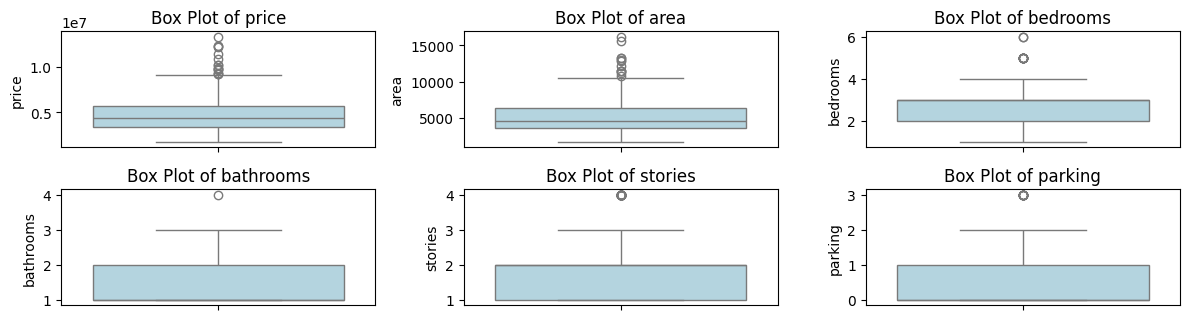

In [ ]:
plt.figure(figsize=(12, 8))  # Set the figure size
num_rows = 5  # Increased num_rows to 5 to accommodate all 13 plots
num_cols = 3

for i, column in enumerate(selected, 1):
    plt.subplot(num_rows, num_cols, i)  # Update subplot grid
    sns.boxplot(y=df[column],color='lightblue')
    plt.title(f'Box Plot of {column}')

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()

<Axes: ylabel='price'>

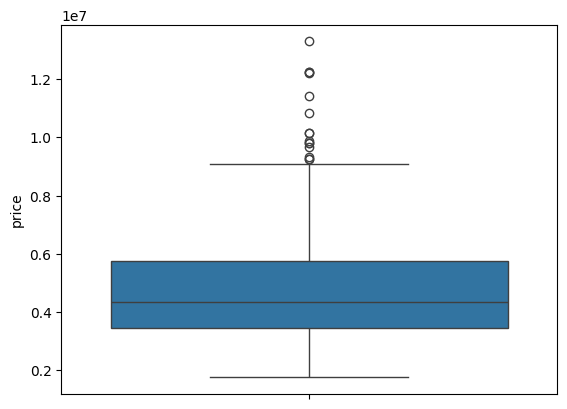

In [ ]:
sns.boxplot(df['price'])

In [ ]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3-q1
lower_lim = q1 - 1.5*iqr
upper_lim = q3 + 1.5*iqr

In [ ]:
q1,q3,iqr

(3430000.0, 5740000.0, 2310000.0)

In [ ]:
lower_lim,upper_lim

(-35000.0, 9205000.0)

In [ ]:
out = df[(df['price'] > upper_lim) | (df['price'] < lower_lim)]

In [ ]:
out

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [ ]:
df.loc[df['price'] > upper_lim, 'price'] = upper_lim
df.loc[df['price'] < lower_lim, 'price'] = lower_lim

<Axes: ylabel='price'>

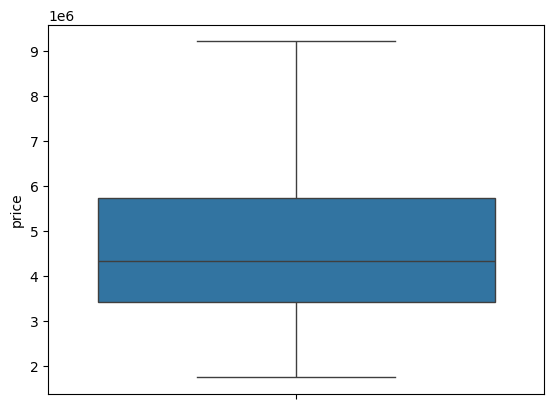

In [ ]:
sns.boxplot(df['price'])

<Axes: ylabel='area'>

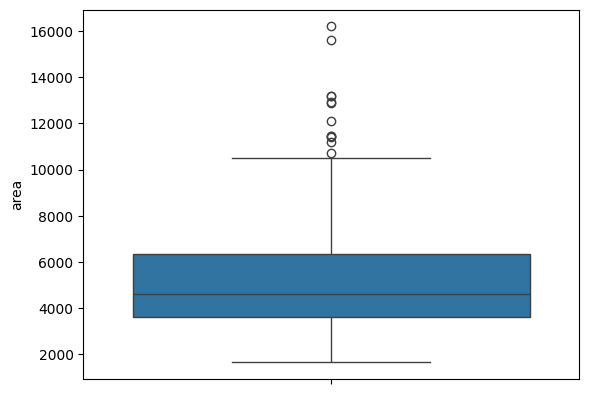

In [ ]:
sns.boxplot(df['area'])

In [ ]:
q1 = df['area'].quantile(0.25)
q3 = df['area'].quantile(0.75)
iqr = q3-q1
lower_lim = q1 - 1.5*iqr
upper_lim = q3 + 1.5*iqr

In [ ]:
q1,q3,iqr

(3600.0, 6360.0, 2760.0)

In [ ]:
lower_lim, upper_lim

(-540.0, 10500.0)

In [ ]:
out_area = df[(df['area'] > upper_lim) | (df['area'] < lower_lim)]

In [ ]:
out_area

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,9205000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
10,9205000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished
56,7343000,11440,4,1,2,yes,no,yes,no,no,1,yes,semi-furnished
64,7000000,11175,3,1,1,yes,no,yes,no,yes,1,yes,furnished
66,6930000,13200,2,1,1,yes,no,yes,yes,no,1,no,furnished
69,6790000,12090,4,2,2,yes,no,no,no,no,2,yes,furnished
125,5943000,15600,3,1,1,yes,no,no,no,yes,2,no,semi-furnished
129,5873000,11460,3,1,3,yes,no,no,no,no,2,yes,semi-furnished
186,5110000,11410,2,1,2,yes,no,no,no,no,0,yes,furnished
191,5040000,10700,3,1,2,yes,yes,yes,no,no,0,no,semi-furnished


In [ ]:
df.loc[df['area'] > upper_lim, 'area'] = upper_lim
df.loc[df['area'] < lower_lim, 'area'] = lower_lim

<Axes: ylabel='area'>

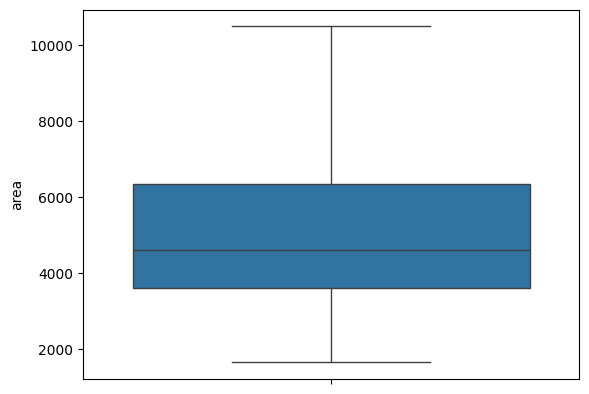

In [ ]:
sns.boxplot(df['area'])

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,9205000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,9205000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9205000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,9205000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,9205000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df['mainroad'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df['guestroom'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df['basement'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df['hotwaterheating'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df['airconditioning'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df['prefarea'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [ ]:
le=LabelEncoder()

In [ ]:
for col in ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
            'airconditioning', 'prefarea', 'furnishingstatus']:
    df['le_' + col] = le.fit_transform(df[col])

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,le_mainroad,le_guestroom,le_basement,le_hotwaterheating,le_airconditioning,le_prefarea,le_furnishingstatus
0,9205000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,1,0,0,0,1,1,0
1,9205000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,1,0,0,0,1,0,0
2,9205000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1,0,1,0,0,1,1
3,9205000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,1,0,1,0,1,1,0
4,9205000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,1,1,1,0,1,0,0


# **Feature Selection**

In [ ]:
features = df[['area','bedrooms','bathrooms','stories','parking','le_mainroad','le_guestroom',
          'le_basement','le_hotwaterheating','le_airconditioning','le_prefarea','le_furnishingstatus']]

In [ ]:
features

,area,bedrooms,bathrooms,stories,parking,le_mainroad,le_guestroom,le_basement,le_hotwaterheating,le_airconditioning,le_prefarea,le_furnishingstatus
0,7420,4,2,3,2,1,0,0,0,1,1,0
1,8960,4,4,4,3,1,0,0,0,1,0,0
2,9960,3,2,2,2,1,0,1,0,0,1,1
3,7500,4,2,2,3,1,0,1,0,1,1,0
4,7420,4,1,2,2,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,1,0,1,0,0,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,0,1,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [ ]:
target = df['price']

In [ ]:
target

,price
0,9205000
1,9205000
2,9205000
3,9205000
4,9205000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


In [ ]:
ss = StandardScaler()

In [ ]:
ss_df = ss.fit_transform(features)

In [ ]:
ss_df

array([[ 1.15658327,  1.40341936,  1.42181174, ...,  1.4726183 ,
         1.80494113, -1.40628573],
       [ 1.92506041,  1.40341936,  5.40580863, ...,  1.4726183 ,
        -0.55403469, -1.40628573],
       [ 2.42407154,  0.04727831,  1.42181174, ..., -0.67906259,
         1.80494113, -0.09166185],
       ...,
       [-0.73965902, -1.30886273, -0.57018671, ..., -0.67906259,
        -0.55403469,  1.22296203],
       [-1.09395692,  0.04727831, -0.57018671, ..., -0.67906259,
        -0.55403469, -1.40628573],
       [-0.62488646,  0.04727831, -0.57018671, ..., -0.67906259,
        -0.55403469,  1.22296203]])

# **Model Training**

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(ss_df, target, test_size=0.2, random_state=0)

In [ ]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((436, 12), (109, 12), (436,), (109,))

# **Linear Regression**

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
ypred=lr.predict(xtest)

In [ ]:
ypred

array([ 4007877.99161288,  6111769.54373083,  4416326.43738446,
        6699611.53480697,  2943502.43608678,  7056633.73850357,
        3235970.36915839,  3174809.26516679,  3451885.0805991 ,
        8196888.59261359,  6608123.2613851 ,  3832164.13420655,
        3762225.48617292,  4686909.52618551,  4001110.99810013,
        2075815.43276707,  4015046.34238242,  3709140.65976372,
        3211561.43578158,  4583874.50697678,  5917579.69226888,
        6479698.78379952,  4692607.58188371,  2766868.63191559,
        5314695.45499359,  5679758.72218174,  5190723.68645495,
        5463307.64568701,  5571046.87808072,  5774489.41604293,
        3326992.07803354,  6242002.10838795,  6995078.3851952 ,
        2995060.12670042,  4460123.50169055,  5016770.31899275,
        4882658.2347299 ,  3654308.16004005,  3027008.98207943,
        3987946.07880223,  7941403.20254504,  4917744.72722048,
        6430838.8322824 ,  3635291.9636818 ,  3744407.95729454,
        6299150.99619949,  4542892.75822

In [ ]:
ytest

,price
239,4585000
113,6083000
325,4007500
66,6930000
479,2940000
...,...
76,6650000
132,5810000
311,4123000
464,3080000


# **Model Evaluation**

In [ ]:
r2_linear=r2_score(ytest,ypred)

In [ ]:
r2_linear

0.6258795720453351

# **Prediction**

In [ ]:
index = 18
actual_index = ytest.index[index]

print(f"Actual Price: {ytest[actual_index]}")
print(f"Predicted Price: {ypred[index]}")

Actual Price: 3360000
Predicted Price: 3211561.4357815823


# **Visualization**

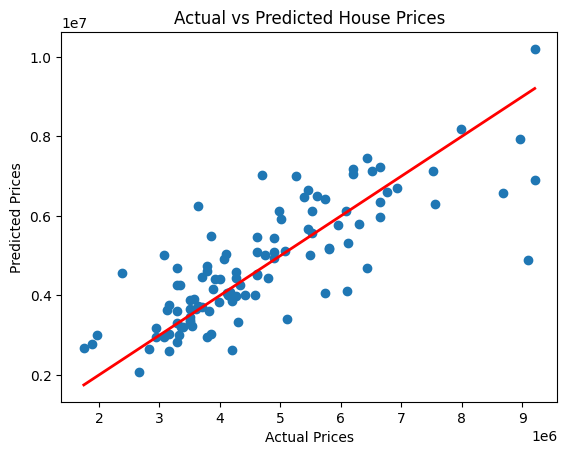

In [ ]:
plt.scatter(ytest, ypred)
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='red', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()